<a href="https://colab.research.google.com/github/Umesh2851997/Programming/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

GitHub link :- https://github.com/Umesh2851997/Programming/blob/main/Applied_Statistics_Project.ipynb

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import statistics


In [ ]:
df = pd.read_csv('/Superstore Marketing Data - Sheet1.csv')

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().any()

Id                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
Complain               False
dtype: bool

In [ ]:
df['Income'].unique()

array([84835., 57091., 67267., ..., 46310., 65819., 94871.])

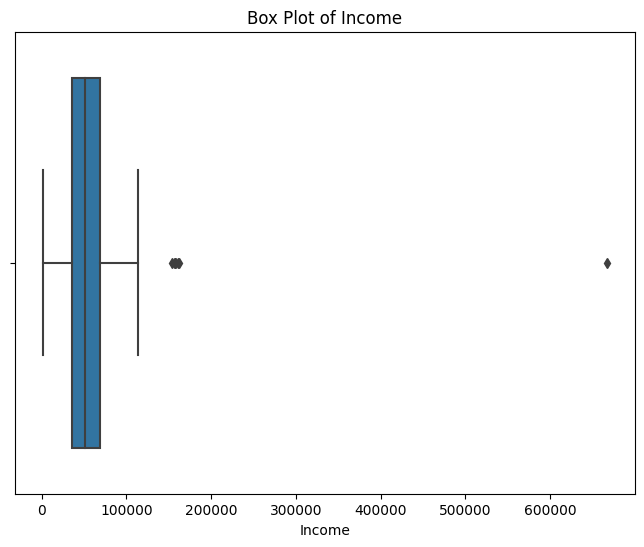

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot to visualize the 'Income' distribution.
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()


In [ ]:
df.dropna(subset = ['Income'], axis = 0, inplace = True)

In [ ]:
df.isnull().any()

Id                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
Complain               False
dtype: bool

In [ ]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           PhD
2236      2n Cycle
2237    Graduation
2238    Graduation
2239           PhD
Name: Education, Length: 2216, dtype: object

In [ ]:
from datetime import datetime

In [ ]:
df['Year_Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year_Birth, Length: 2216, dtype: int64

In [ ]:
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Year_Birth']

In [ ]:
df['Age']

0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2216, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

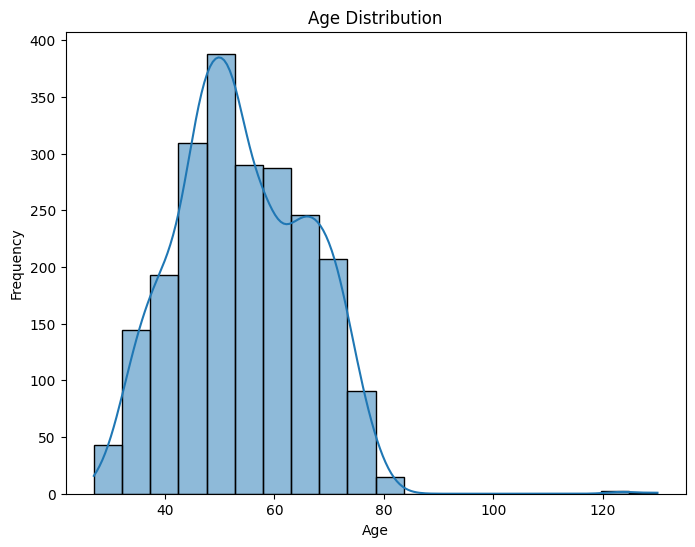

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


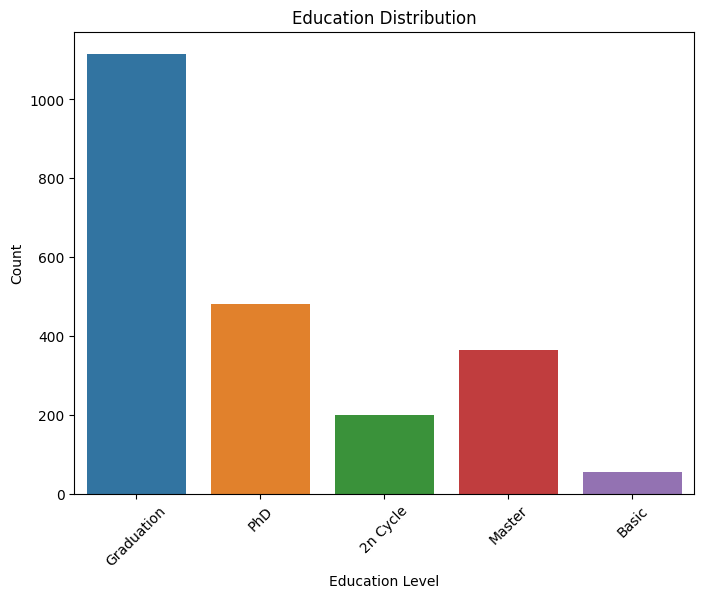

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the 'Education' column.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,0,34,2,3,1,2,7,1,0,34


In [ ]:
marital_counts = df['Marital_Status'].value_counts()
print(marital_counts)


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


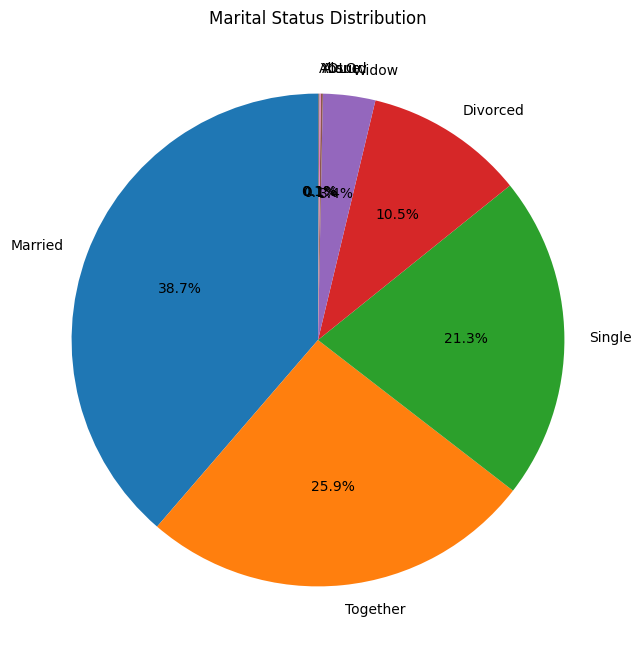

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.show()


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# Specify the variable of interest (e.g., 'Income').
variable_name = 'Income'

# Extract the values from the DataFrame for the specified variable.
data = df[variable_name]

# Calculate measures of central tendency.
mean_value = statistics.mean(data)
median_value = statistics.median(data)


# Calculate the mode (if it exists) using a try-except block.
from scipy import stats

mode_value = stats.mode(data)

# Calculate measures of dispersion.
variance_value = statistics.variance(data)
std_deviation_value = statistics.stdev(data)

# Print the results.
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")


Mean: 52247.25135379061
Median: 51381.5
Mode: ModeResult(mode=7500.0, count=12)
Variance: 633683788.575619
Standard Deviation: 25173.076660901403


Variable: Income
Mean: 52247.25135379061
Median: 51381.5
Mode: 7500.0
Variance: 633397830.1872725
Standard Deviation: 25167.396174162965




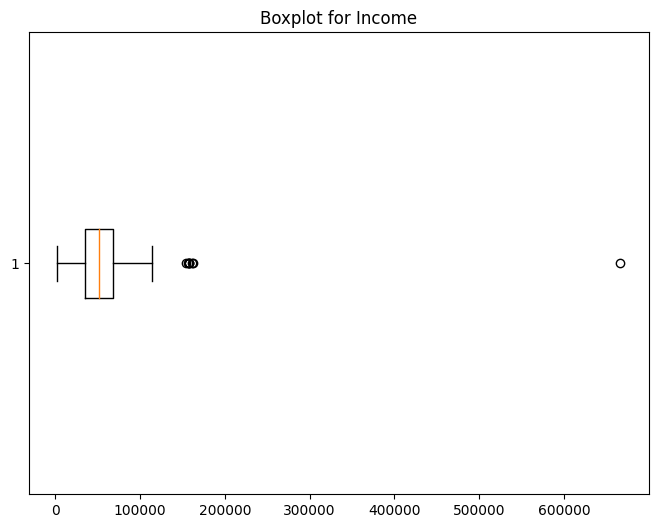

Variable: Age
Mean: 54.17960288808664
Median: 53.0
Mode: 47
Variance: 143.58868143074977
Standard Deviation: 11.982849470420204




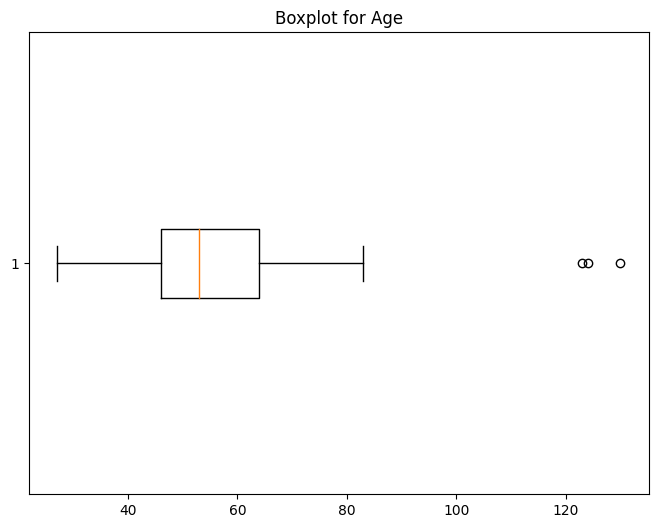

In [ ]:
# Choose the variables of interest (e.g., 'Income', 'Age', etc.).
variables_of_interest = ['Income', 'Age']

# Calculate and print descriptive statistics for each variable.
for variable_name in variables_of_interest:
    data = df[variable_name]
    mean = np.mean(data)
    median = np.median(data)
    mode = statistics.mode(data)
    variance = np.var(data)
    std_deviation = np.std(data)

    # Print the descriptive statistics for the current variable.
    print(f"Variable: {variable_name}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_deviation}")
    print("\n")

    # Create and save a boxplot to visualize potential outliers.
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot for {variable_name}")
    plt.show()


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,0,34,2,3,1,2,7,1,0,34


In [ ]:
income_mean = df['Income'].mean()
income_std_dev = df['Income'].std()

# Calculate the probability that income is less than a specific value.
x = 50000  # Example value
income_prob = stats.norm.cdf(x, loc=income_mean, scale=income_std_dev)
income_expected_value = income_mean

print(income_prob)
print(income_std_dev)

0.4644328658146633
25173.076660901403


In [ ]:
from scipy.stats import binom

n_age_groups = 4  # Number of age groups
p_age_group = 0.25  # Probability of being in a specific age group

# Calculate the probability that 'Age' falls into a specific age group (e.g., group 2).
k_age_group = 2
age_group_prob = binom.pmf(k_age_group, n_age_groups, p_age_group)
age_group_expected_value = n_age_groups * p_age_group
print(age_group_prob)
print(age_group_expected_value)


0.21093750000000006
1.0


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Extract 'Income' and 'Age' columns from the dataset.
income_data = df['Income']
age_data = df['Age']

# Determine suitable probability distributions for 'Income' and 'Age'.
# For the 'Income' variable, we'll assume it follows a Normal distribution.
income_mean = income_data.mean()
income_std_dev = income_data.std()

# For the 'Age' variable, we'll assume it follows a Binomial distribution.
n_age_groups = 4  # Assuming 4 age groups
p_age_group = 0.25  # Probability of being in a specific age group

# Calculate probabilities and expected values for 'Income'.
x_income = 45000  # Example income value
income_prob = stats.norm.cdf(x_income, loc=income_mean, scale=income_std_dev)
income_expected_value = income_mean

# Calculate probabilities and expected values for 'Age'.
k_age_group = 2  # Example age group
age_group_prob = stats.binom.pmf(k_age_group, n_age_groups, p_age_group)
age_group_expected_value = n_age_groups * p_age_group

# Print results
print("Income Distribution Parameters:")
print(f"Mean: {income_mean}")
print(f"Standard Deviation: {income_std_dev}\n")

print("Calculated Probabilities for Income:")
print(f"Probability that income is less than $45,000: {income_prob:.4f}")
print(f"Expected Income Value: ${income_expected_value:.2f}\n")

print("Age Distribution Parameters:")
print(f"Number of Age Groups: {n_age_groups}")
print(f"Probability of Being in a Specific Age Group: {p_age_group:.2f}\n")

print("Calculated Probabilities for Age:")
print(f"Probability of being in Age Group 2: {age_group_prob:.4f}")
print(f"Expected Age Group: {age_group_expected_value}\n")


Income Distribution Parameters:
Mean: 52247.25135379061
Standard Deviation: 25173.076660901403

Calculated Probabilities for Income:
Probability that income is less than $45,000: 0.3867
Expected Income Value: $52247.25

Age Distribution Parameters:
Number of Age Groups: 4
Probability of Being in a Specific Age Group: 0.25

Calculated Probabilities for Age:
Probability of being in Age Group 2: 0.2109
Expected Age Group: 1.0



## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

In [ ]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,0,34,2,3,1,2,7,1,0,34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


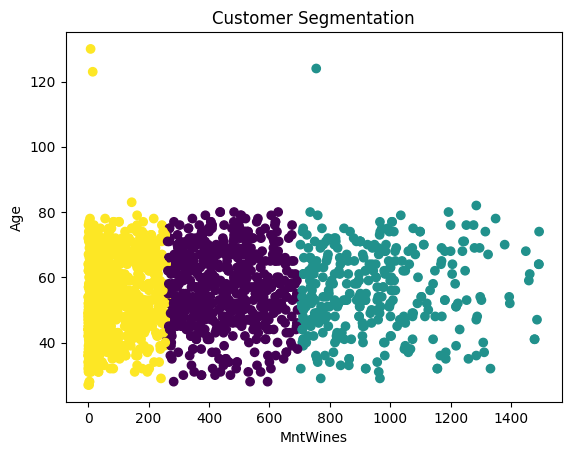

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant columns from your dataset
selected_data = df[['MntWines', 'Age']]

# Choose the number of clusters (k) based on business goals or a metric like silhouette score
k = 3

# Fit a k-means model
kmeans = KMeans(n_clusters=k)
df['Cluster'] = kmeans.fit_predict(selected_data)

# Visualize the clusters
plt.scatter(df['MntWines'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.xlabel('MntWines')
plt.ylabel('Age')
plt.title('Customer Segmentation')
plt.show()


**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

<ipython-input-79-68daed8bc8a0>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


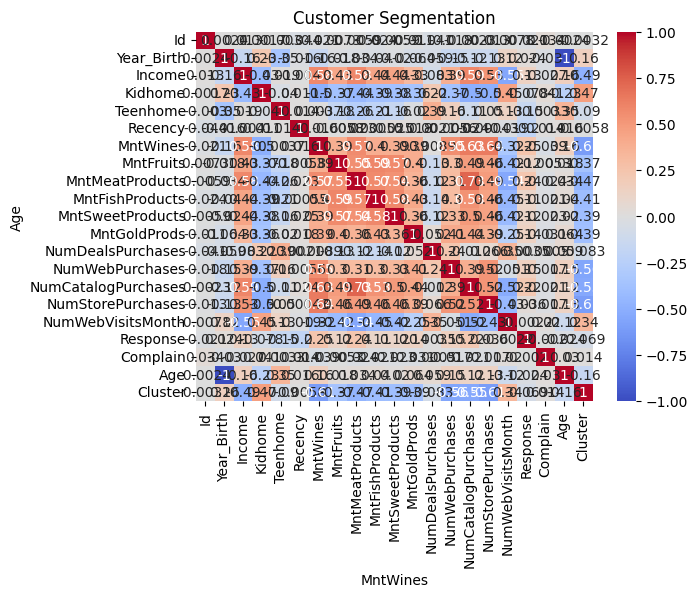

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Preprocessing
# - Handle missing values
# - Select relevant columns
# - Convert data types

# EDA: Explore Relationships
# - Calculate correlations and visualize using heatmaps
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Customer Segmentation
# - Choose relevant variables for clustering (e.g., 'MntWines' and 'Age')
selected_data = df[['MntWines', 'Age']]

# Determine the number of clusters (k) using methods like the elbow method
# For simplicity, let's assume k=3
k = 3

kmeans = KMeans(n_clusters=k)
df['Cluster'] = kmeans.fit_predict(selected_data)

# Visualize Customer Segments
plt.scatter(df['MntWines'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.xlabel('MntWines')
plt.ylabel('Age')
plt.title('Customer Segmentation')

# Feature Importance (if applicable)
# - Analyze feature importance from your clustering model

# Insights and Findings
# - Summarize key insights and findings

# Recommendations
# - Provide actionable recommendations for marketing or business strategies

# Limitations
# - Acknowledge any limitations of your analysis

# Conclusion
# - Summarize the key takeaways and impact of your analysis

# Display the visualizations and findings
plt.show()

# Save the report as a PDF, HTML, or in any format you prefer
# You can use libraries like Matplotlib or report generation libraries

# Additional analysis, hypothesis testing, and code can be added based on your specific requirements.

# Make sure to adapt this code to your dataset and extend it as needed to provide a comprehensive analysis and report.


## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

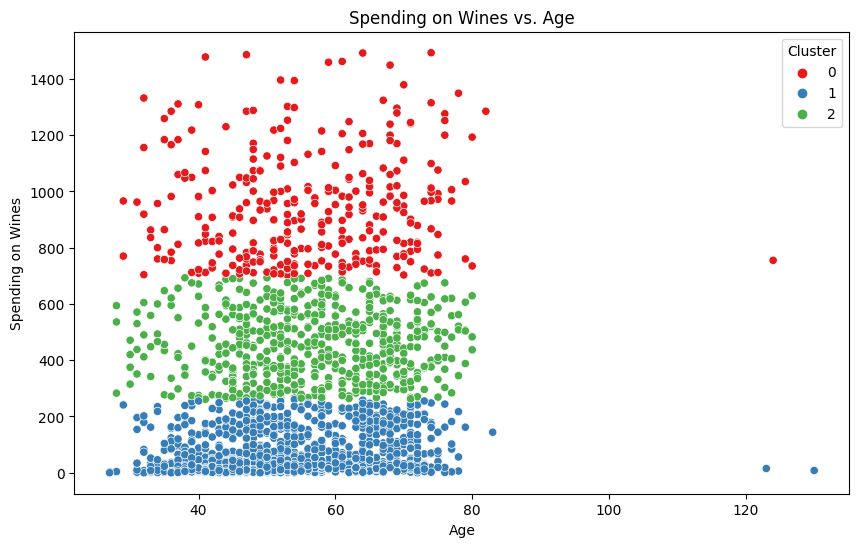

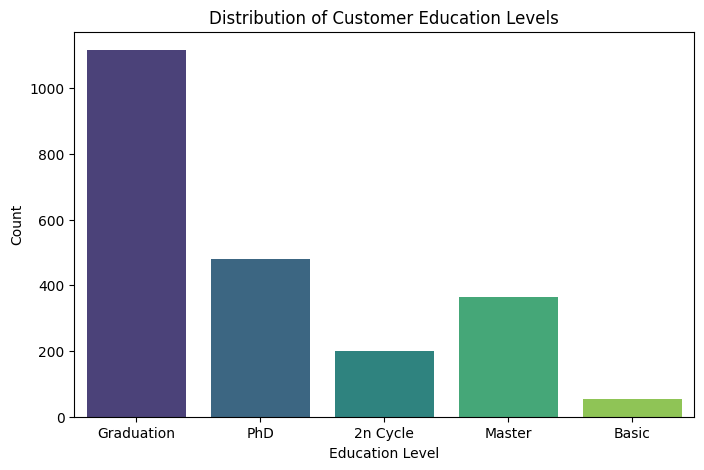

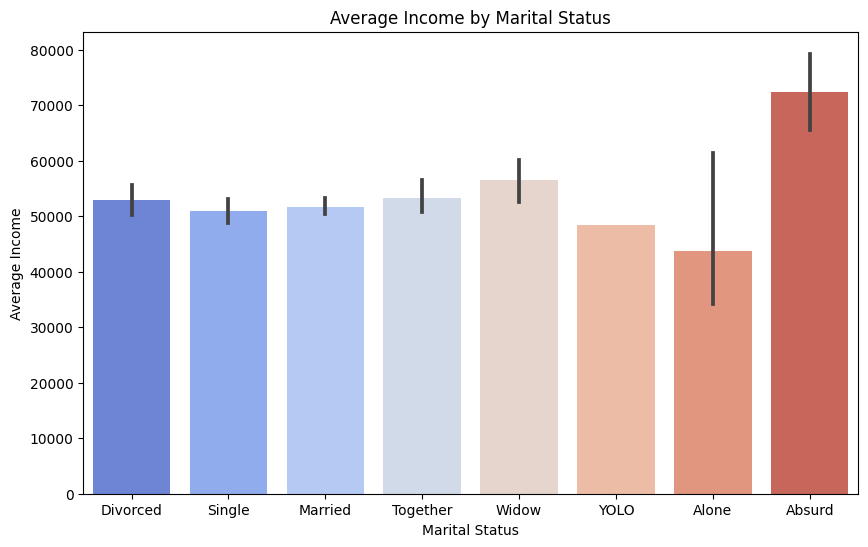

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Scatter Plot of Spending on Wines vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MntWines', hue='Cluster', palette='Set1')
plt.title('Spending on Wines vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending on Wines')

# Visualization 2: Distribution of Customer Education Levels
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Distribution of Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Visualization 3: Average Income by Marital Status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marital_Status', y='Income', palette='coolwarm')
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')

# Recommendations
# Based on the analysis, make actionable recommendations.

# Recommendation 1: Target Marketing
# - Customers in Cluster 2, characterized by high spending on wines, are a valuable segment.
# - Develop targeted marketing campaigns or loyalty programs for this group.

# Recommendation 2: Education-Based Strategy
# - Focus marketing efforts on customers with higher education levels as they may have more disposable income.

# Recommendation 3: Marital Status Impact
# - Consider marital status when designing marketing strategies. For example, single customers have varying spending habits.

# Save or display the visualizations
plt.show()
